In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report, log_loss, f1_score, recall_score,\
mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
test=pd.read_csv(r'G:\machinelearning\Test.csv')
train=pd.read_csv(r'G:\machinelearning\Train.csv')

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [12]:
train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [16]:
pd.crosstab(train['Outlet_Size'], train['Outlet_Type'], margins=True)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,932,0,0,932
Medium,0,930,928,935,2793
Small,528,1860,0,0,2388
All,528,3722,928,935,6113


In [17]:
def fill(row):
    if(pd.isna(row['Outlet_Size'])):
        match row['Outlet_Type']:
            case 'Grocery Store':
                return 'Small'
            case 'Supermarket Type1':
                return 'Small'
            case 'Supermarket Type2':
                return 'Medium'
            case 'Supermarket Type3':
                return 'Medium'
    return row['Outlet_Size']

In [18]:
train['Outlet_Size']=train.apply(fill,axis=1)

In [20]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

C:\Users\home\AppData\Local\Temp\ipykernel_1100\1900965959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)


In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
max_visibility_per_item = train[train['Item_Visibility'] > 0].groupby('Item_Identifier')['Item_Visibility'].max()

train.loc[train['Item_Visibility'] == 0, 'Item_Visibility'] = train['Item_Identifier'].map(max_visibility_per_item)

train['Item_Visibility'] = train['Item_Identifier'].map(max_visibility_per_item)

In [24]:
train.query('Item_Visibility == 0')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


C:\Users\home\AppData\Local\Temp\ipykernel_1100\3036760151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)
C:\Users\home\AppData\Local\Temp\ipykernel_1100\3036760151.py:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)


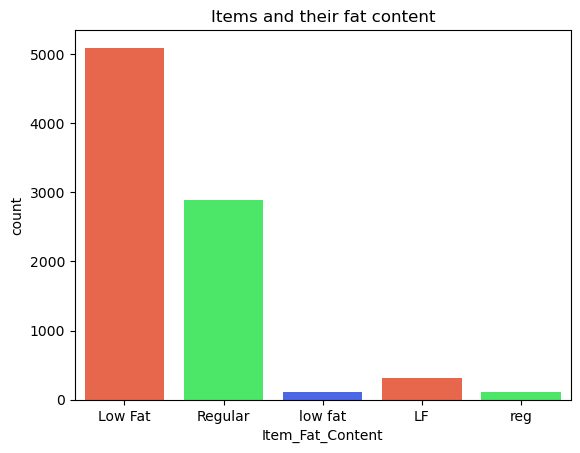

In [26]:
custom_palette = ['#FF5733', '#33FF57', '#3357FF']
sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)
plt.title('Items and their fat content')
plt.show()

In [27]:
train.loc[train['Item_Fat_Content'].isin(['low fat', 'LF']), 'Item_Fat_Content'] = 'Low Fat'
train.loc[train['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

C:\Users\home\AppData\Local\Temp\ipykernel_1100\3036760151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)
C:\Users\home\AppData\Local\Temp\ipykernel_1100\3036760151.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)


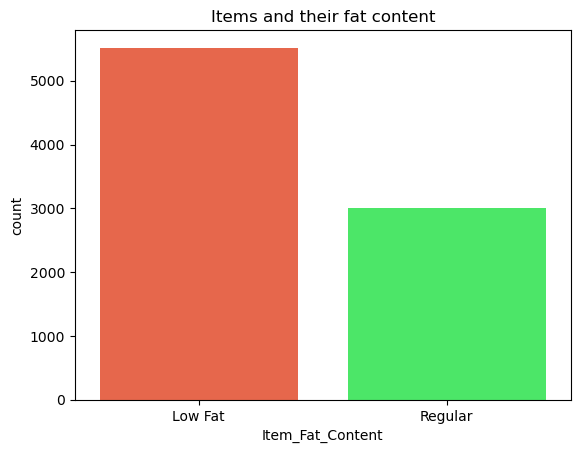

In [28]:
custom_palette = ['#FF5733', '#33FF57', '#3357FF']
sns.countplot(data=train, x='Item_Fat_Content', palette=custom_palette)
plt.title('Items and their fat content')
plt.show()

In [29]:
#outliers
cols = [ 'Item_MRP', 'Item_Weight','Item_Visibility', 'Item_Outlet_Sales']

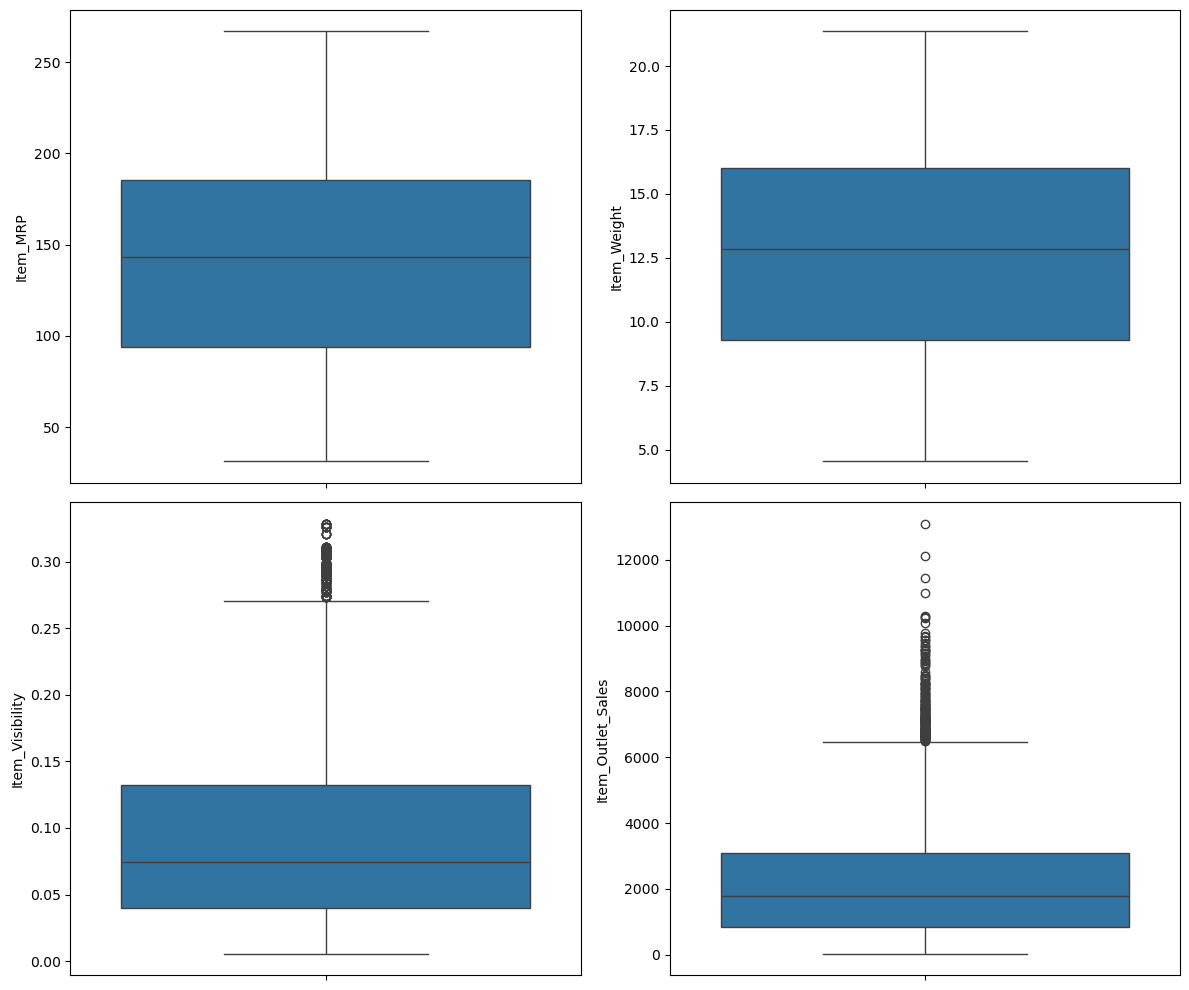

In [32]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train, y=col)
plt.tight_layout()
plt.show()

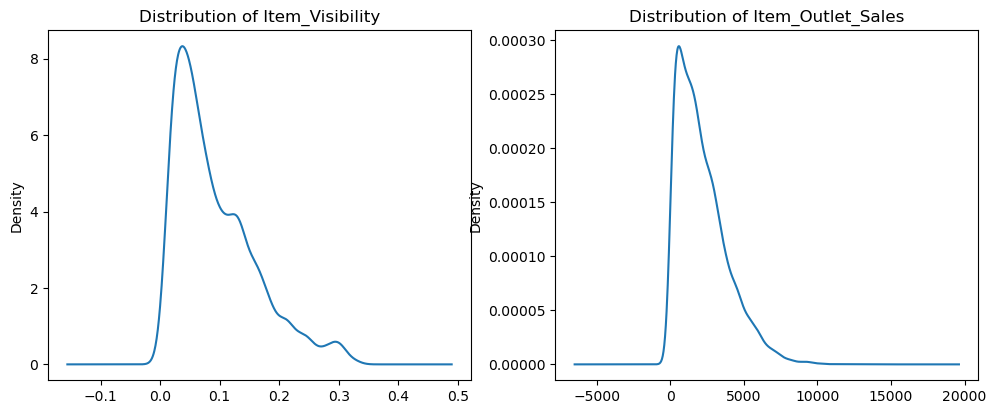

In [33]:
cols = ['Item_Visibility', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    train[col].plot.kde()
    plt.title(f'Distribution of {col}')
plt.show()

In [34]:
train['Item_Outlet_Sales'].skew()

1.1775306028542796

In [35]:
train['Item_Visibility'].skew()

1.0884404511154213

In [36]:
#remove outliers and cal q1 and q3
Q1 = train['Item_Outlet_Sales'].quantile(0.25)
Q3 = train['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
upper_bound = Q3 + 1.5 * IQR

In [39]:
train = train.loc[train['Item_Outlet_Sales'] <= upper_bound]

In [40]:
upper_bound = 0.25
train = train.loc[train['Item_Visibility'] <= upper_bound]

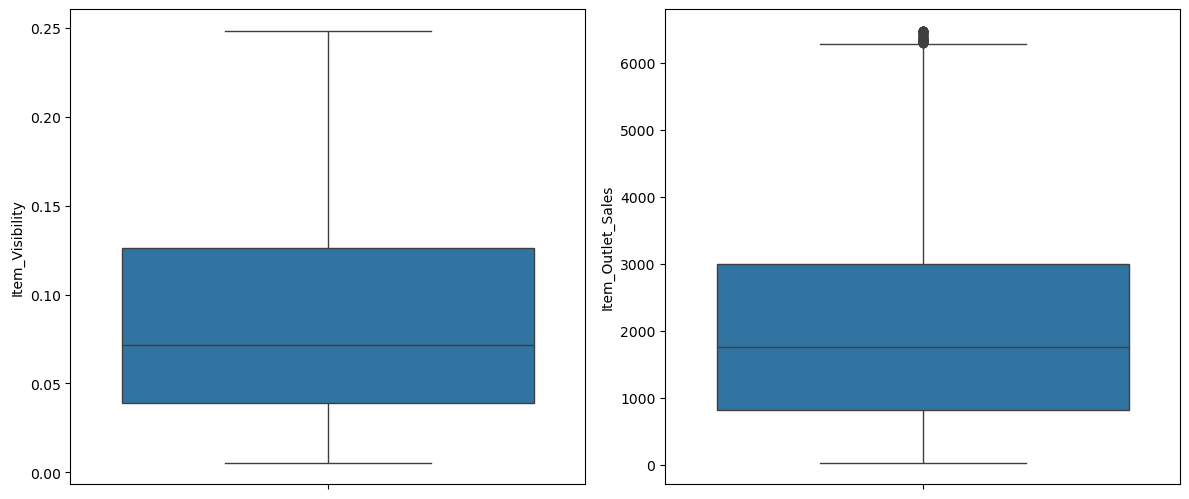

In [41]:
cols = ['Item_Visibility', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train, y=col)
plt.tight_layout()
plt.show()

In [42]:
outlet_sales = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values().reset_index()
outlet_years = train[['Outlet_Identifier', 'Outlet_Establishment_Year']].drop_duplicates().set_index('Outlet_Identifier')
outlet_sales['Label'] = outlet_sales['Outlet_Identifier'] + ' (' + outlet_sales['Outlet_Identifier'].map(outlet_years['Outlet_Establishment_Year'].astype(str)) + ')'

C:\Users\home\AppData\Local\Temp\ipykernel_1100\3584004438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlet_sales,x='Label',y='Item_Outlet_Sales', palette=custom_palette)
C:\Users\home\AppData\Local\Temp\ipykernel_1100\3584004438.py:3: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=outlet_sales,x='Label',y='Item_Outlet_Sales', palette=custom_palette)


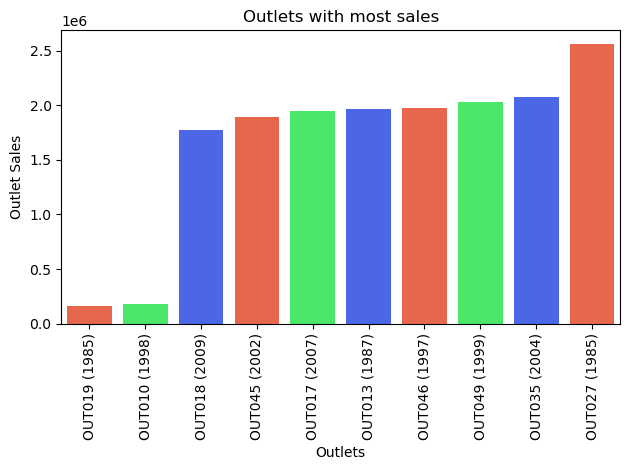

In [44]:
custom_palette = ['#FF5733', '#33FF57', '#3357FF']

sns.barplot(data=outlet_sales,x='Label',y='Item_Outlet_Sales', palette=custom_palette)
plt.title('Outlets with most sales')
plt.xlabel('Outlets')
plt.ylabel('Outlet Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

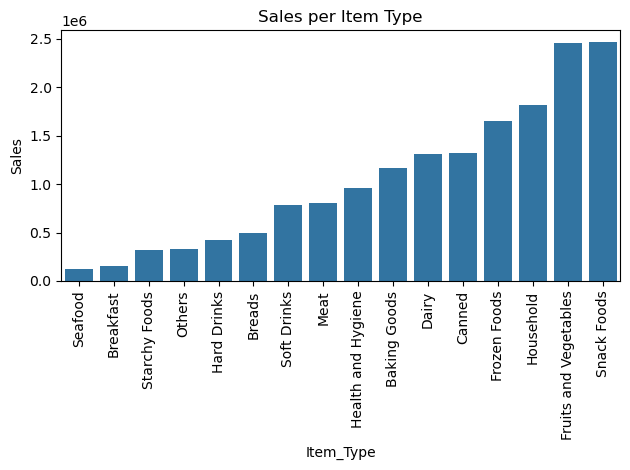

In [45]:
category_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index()

sns.barplot(data=category_sales, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Sales per Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

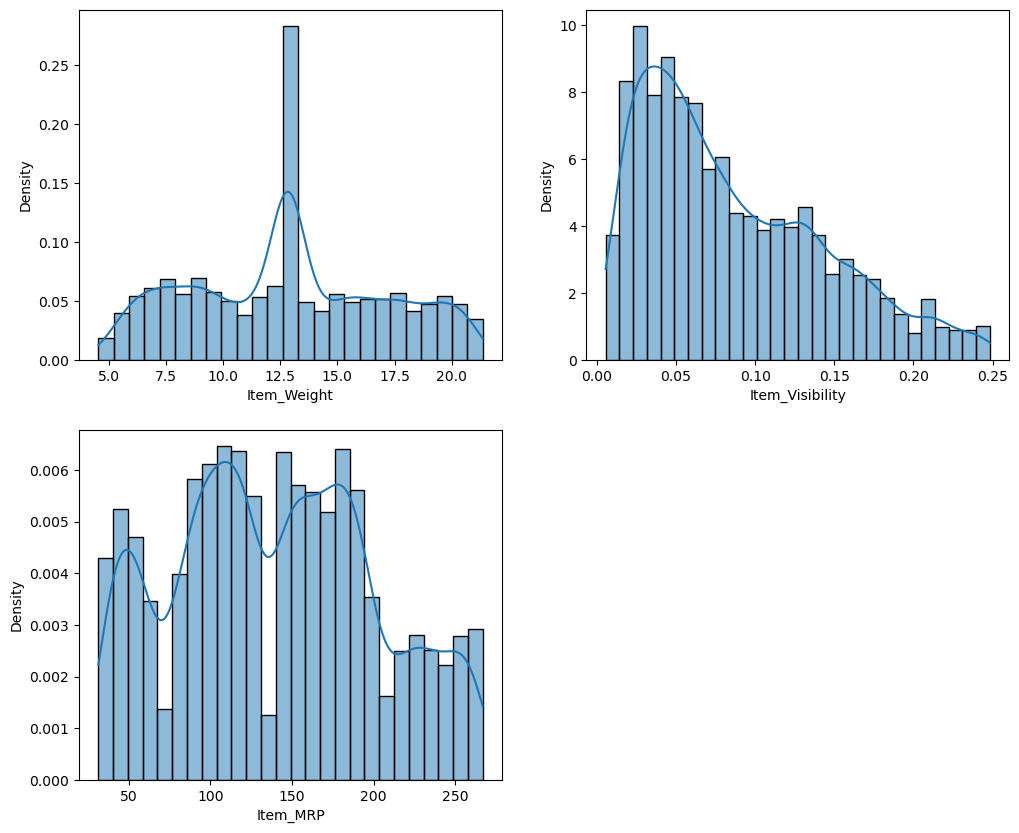

In [46]:
num_features = ['Item_Weight','Item_Visibility', 'Item_MRP']
plt.figure(figsize=(12, 10))
for i,col in enumerate(num_features,1):
    plt.subplot(2, 2, i)
    sns.histplot(data=train,x=col, kde=True, stat="density")
plt.show()

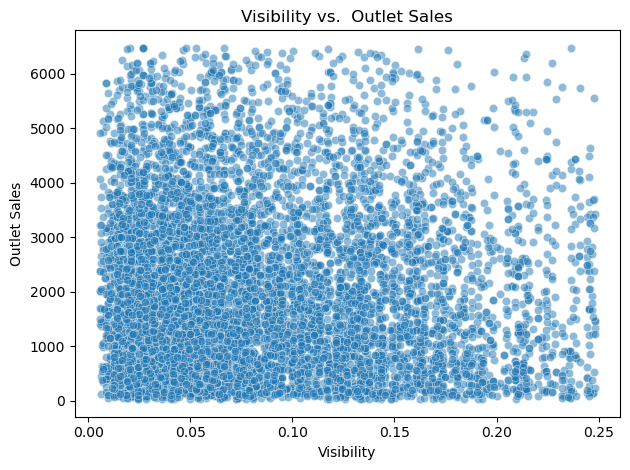

In [47]:
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Visibility vs.  Outlet Sales')
plt.xlabel('Visibility')
plt.ylabel('Outlet Sales')
plt.tight_layout()
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

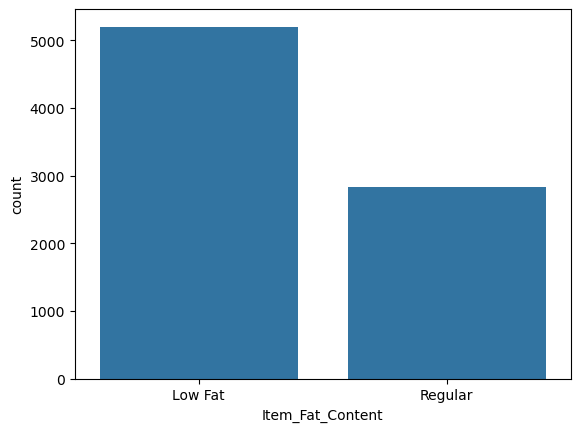

In [48]:
sns.countplot(data=train,x='Item_Fat_Content')

Text(0.5, 1.0, 'Outlets by location types')

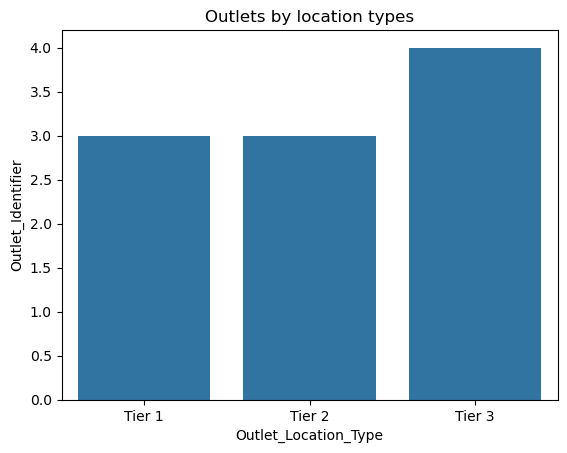

In [49]:
outlets_by_location = train.groupby('Outlet_Location_Type')['Outlet_Identifier'].nunique().reset_index()

sns.barplot(data=outlets_by_location, x='Outlet_Location_Type', y='Outlet_Identifier')
plt.title('Outlets by location types')

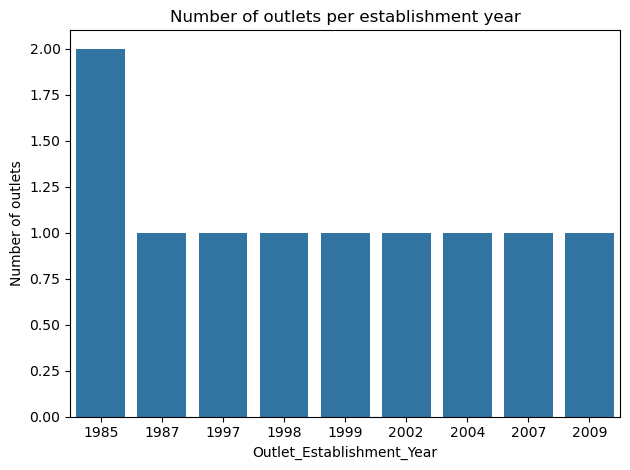

In [50]:
outlets_by_year = train.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].nunique().reset_index()
sns.barplot(data=outlets_by_year, x='Outlet_Establishment_Year', y='Outlet_Identifier')

plt.title('Number of outlets per establishment year')
plt.ylabel('Number of outlets')
plt.tight_layout()
plt.show()

In [51]:
train['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    5753
NC    1514
DR     763
Name: count, dtype: int64

In [52]:
train['Item_Category'] = train['Item_Identifier'].str[:2].map({
    'FD': 'Food', 
    'DR': 'Drink', 
    'NC': 'Non-Consumable'
})

In [55]:
train['Item_Category'].value_counts()

Item_Category
Food              5753
Non-Consumable    1514
Drink              763
Name: count, dtype: int64

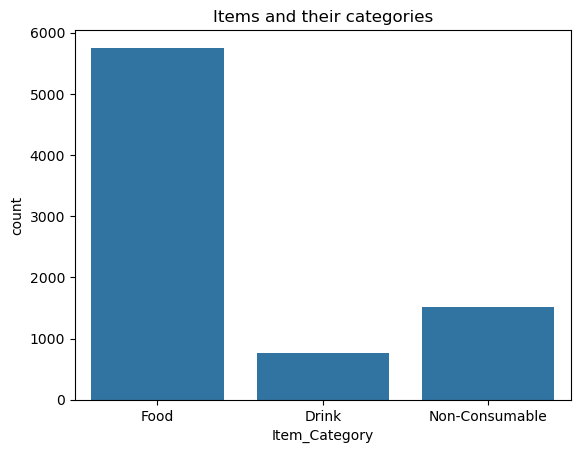

In [56]:
sns.countplot(data=train, x='Item_Category')
plt.title('Items and their categories')
plt.show()

In [57]:
train.drop(columns='Item_Identifier', inplace=True) 

<Axes: >

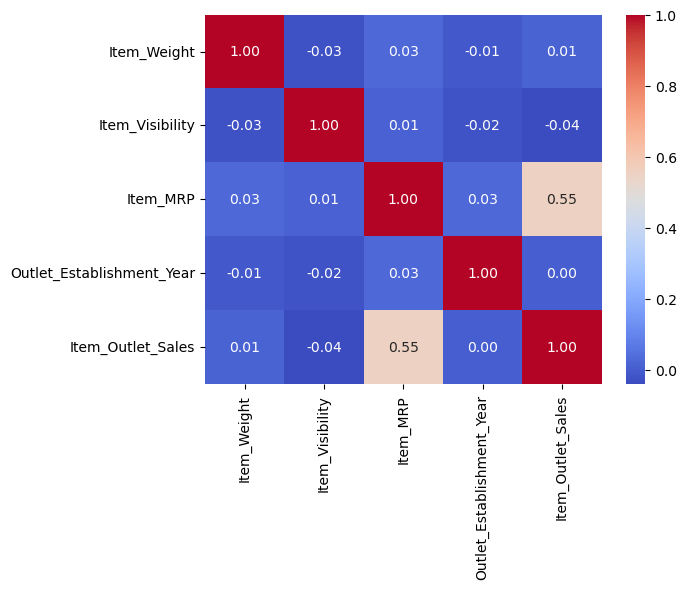

In [58]:
corr_matrix=train.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')

In [59]:
numerical_features = ['Item_Visibility','Item_Weight','Item_MRP']

In [60]:
scaler = StandardScaler()

train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [62]:
#label encoding

categorical_features = train.dtypes[train.dtypes == 'object'].index.tolist()
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Category']

In [63]:
le = LabelEncoder()

for col in categorical_features:
    train[col] = le.fit_transform(train[col])

In [69]:
#train&test split
xr = train.drop(columns=['Item_Outlet_Sales'])
yr = train['Item_Outlet_Sales']

In [70]:
xrtr,xrts,yrtr,yrts=train_test_split(xr,yr,test_size=0.2,random_state=0)

In [71]:

xc = train.drop(columns=['Item_Category', 'Item_Type'])
yc = train['Item_Category']
xctr, xcts, yctr, ycts= train_test_split(xc, yc, test_size=0.2, random_state=25)

In [72]:
#model
xtr=xrtr
ytr=yrtr
xts=xrts
yts=yrts

In [77]:
def model_metrics(predicted):
    rmse = mean_squared_error(predicted, yts, squared= False)
    mae = mean_absolute_error(predicted, yts)
    r2 = r2_score(predicted, yts)
    
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Error: ', mae)
    print('R2 Score: ', r2)

In [78]:
#linear regression
lr=LinearRegression()
lr.fit(xtr,ytr)

LinearRegression()

In [79]:
ypred=lr.predict(xts)

In [80]:
model_metrics(ypred)

Root Mean Squared Error:  1090.849750117836
Mean Absolute Error:  847.5408049060422
R2 Score:  -0.10112020861248472


C:\Users\home\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
#rfc

from sklearn.metrics import classification_report
features = train.drop(columns=['Item_Outlet_Sales', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
features = pd.get_dummies(features)  
target = train['Outlet_Type']  

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

predictions = rfc.predict(X_test)


print(classification_report(y_test, predictions))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      1067
           2       1.00      1.00      1.00       171
           3       1.00      1.00      1.00       158

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



In [96]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


In [97]:
!pip install xgboost

In [99]:
data_dmatrix = xgb.DMatrix(data=xtr,label=ytr)

In [100]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

In [102]:
xgbc=XGBClassifier(**params)

In [104]:
xgbc.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [105]:
print(xgbc)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [106]:
ypred=xgbc.predict(X_test)

In [107]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

XGBoost model accuracy score: 1.0000


In [109]:
le=LabelEncoder()
y=le.fit_transform(y)

In [114]:

abc=AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model=abc.fit(X_train,y_train)

C:\Users\home\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [115]:
ypred=model.predict(X_test)

In [116]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, ypred))

AdaBoost Classifier Model Accuracy: 1.0
